### Problem Statement - Lending Club Case Study

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file with dtype object.
loan = pd.read_csv('loan.csv',dtype=object)

# check shape & datatype of loan data
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None
id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


### Data Cleaning Starts-

In [3]:
# Check for duplicate rows in dataset based on id column

print(loan.duplicated(subset=None, keep='first').count())
duplicateRecords=loan[loan.duplicated(['id'])]
duplicateRecords

# There are no duplicate rows in loan dataset

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [4]:
# Checking for rows with all empty values
print('Number of empty Rows:')
print(loan.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# Checking row with all empty values
print('Number of empty Columns:')
print(loan.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

#So removing Columns with all empty Columns
loan = loan.dropna(axis=1 , how = 'all')

Number of empty Rows:
0
Number of empty Columns:
54


In [5]:
# Data cleaning
# Lets find Which columns have all null values

loan.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [6]:
# Drop additional columns we don't need these as these are mostly nulls.
columnsToBedropped = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","member_id","url","emp_title","zip_code","tax_liens","policy_code","initial_list_status","installment","pymnt_plan"]
loan.drop(labels = columnsToBedropped, axis =1, inplace=True)

In [7]:
# Data cleaning
# Lets take a look on data shape after dropping columns which had nothing 

loan.shape

# Observations
# So now we are left with 48 columns

(39717, 44)

In [8]:
# Data cleaning
# Formating employment length column to have only numbers. 
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,B,B2,10,RENT,...,0,Jan-15,171.62,May-16,0,INDIVIDUAL,0,0,0,0
1,1077430,2500,2500,2500,60 months,15.27%,C,C4,1,RENT,...,1.11,Apr-13,119.66,Sep-13,0,INDIVIDUAL,0,0,0,0


In [9]:
# Data cleaning
# pub_rec_bankruptcies cleaning
print("Before cleaning:")
print(loan.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [10]:
# Data cleaning
# Remove % symbol from intrest rate column 
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

# Remove % symbol from revol_util column
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [11]:
# convert amount columns into numeric data

numericCols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','annual_inc','dti','emp_length','total_pymnt']
loan[numericCols] = loan[numericCols].apply(pd.to_numeric)


### Derive Columns For Analysis -

In [14]:
# Derived columns
# New column month and year columns separately from issue date

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)

# Observations
# Two new columns month and year were derived from issue date

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,...,171.62,May-16,0,INDIVIDUAL,0,0,0,0,2011,12


### Univariate Analysis -

In [15]:
#Univariate Anylasis on loan Purpose

(loan.purpose.value_counts()*100)/len(loan)

# Observations
# Max loans are taken for Debt Consolidation(46.93)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [16]:
#Univariate Anylasis on loan status

(loan.loan_status.value_counts()*100)/len(loan)

# Observations
# 82.96 percent loans were fully paid.
# Around 14% loans were charged off

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [17]:
# Stats for laon amount
loan['loan_amnt'].describe()


count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

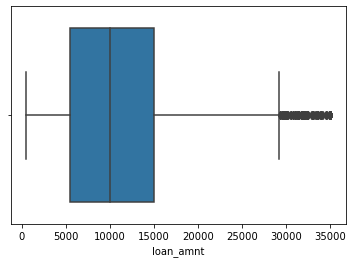

In [18]:
sns.boxplot(loan.loan_amnt)

In [19]:
#Stats for Total payment 
loan.total_pymnt.describe()

count   39717.00
mean    12153.60
std      9042.04
min         0.00
25%      5576.93
50%      9899.64
75%     16534.43
max     58563.68
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

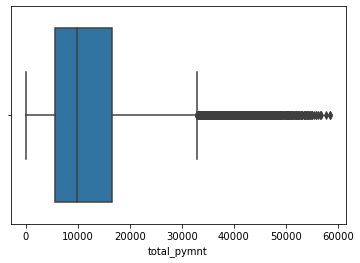

In [20]:
sns.boxplot(loan.total_pymnt)

In [21]:
# Stats Annual Income

print('Before Removal of Outliers :\n')
print(loan['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.98)]

print('After Removal of Outliers :')
print(loan["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before Removal of Outliers :

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64
After Removal of Outliers :
count    38919.00
mean     64080.99
std      32350.16
min       4000.00
25%      40000.00
50%      58000.00
75%      80000.00
max     186996.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

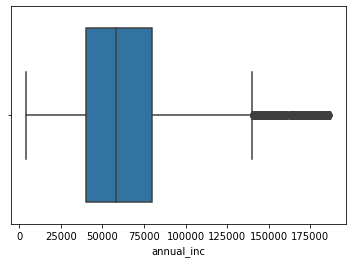

In [22]:
sns.boxplot(loan.annual_inc)

In [23]:
# Basic statistics with .describe() -Quantitative Variables

loan['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate zoom'ed to 25% from 15%.

count   38919.00
mean       12.00
std         3.71
min         5.42
25%         9.07
50%        11.83
75%        14.54
max        24.40
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

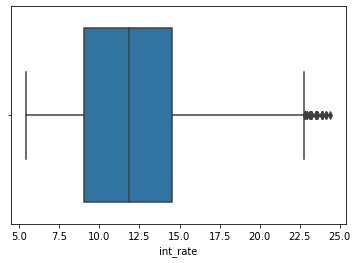

In [24]:
sns.boxplot(loan.int_rate)

### Correlation Matrix - Quantitative Variables :

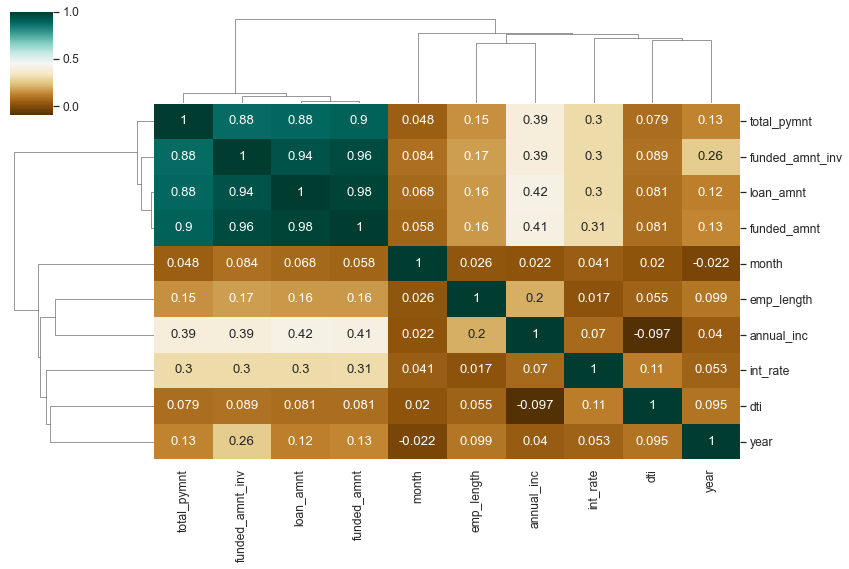

In [25]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;)

### Derive Columns For Analysis -

In [26]:
# Derived columns
# Making loan amounts buckets for bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], range(0,42000,7000), labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# Making annual incomes into buckets for bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], range(0,42000,7000), labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], range(0,30,5), labels=['0-5', '05-10', '10-15', '15-20', '25+'])


In [27]:
print(loan.shape)
loan.head(1)
# Observation five new Coloums.

(38919, 50)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,...,0,0,0,0,2011,12,0-7000,60000-80000,10-13,NaN


### Univariate Analysis - 

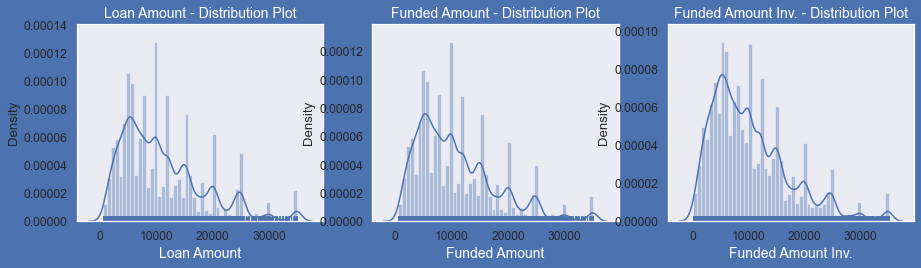

In [28]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.

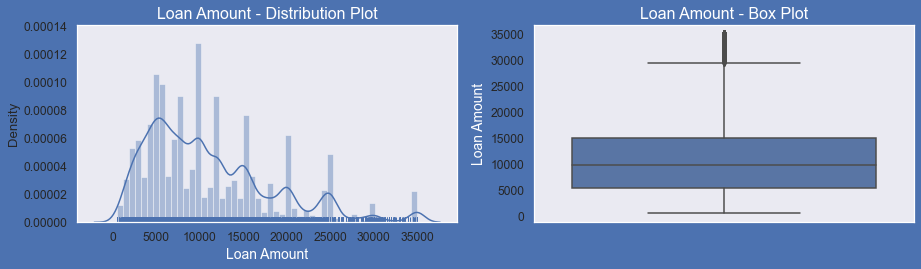

In [29]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

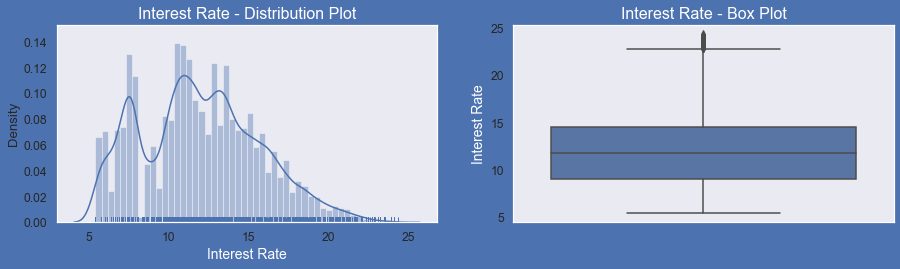

In [30]:
# Univariate Analysis on Intrest Rate

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

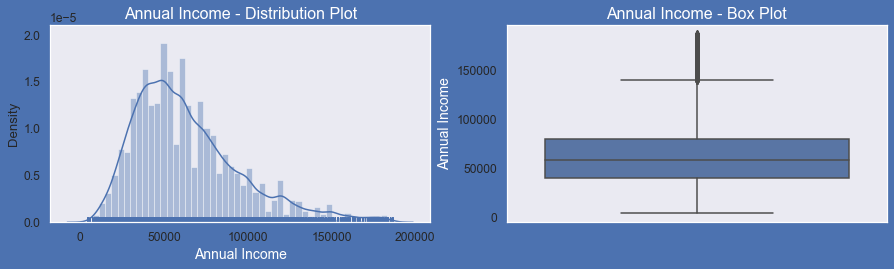

In [31]:
# Univariate Analysis on Annual Income

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

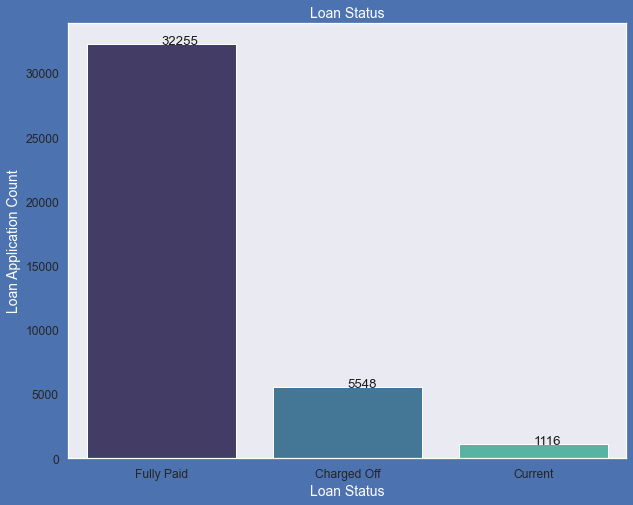

In [32]:
# Univariate Analysis - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

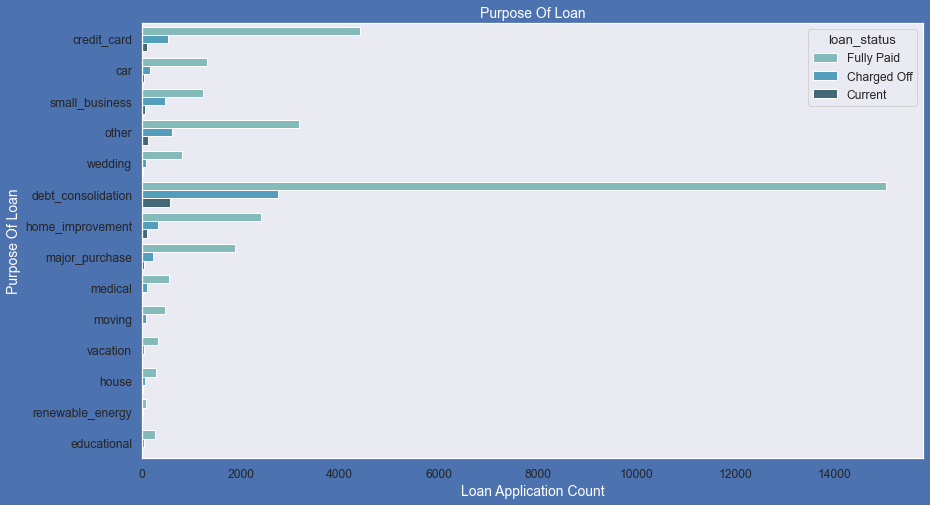

In [33]:
# Univariate Analysis -Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

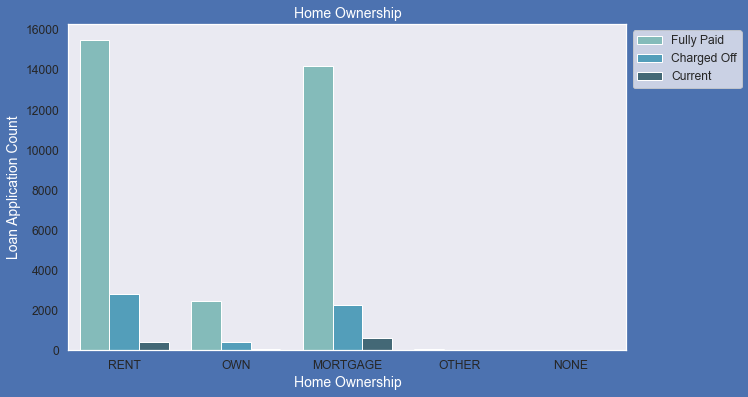

In [34]:
# Univariate Analysis  Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

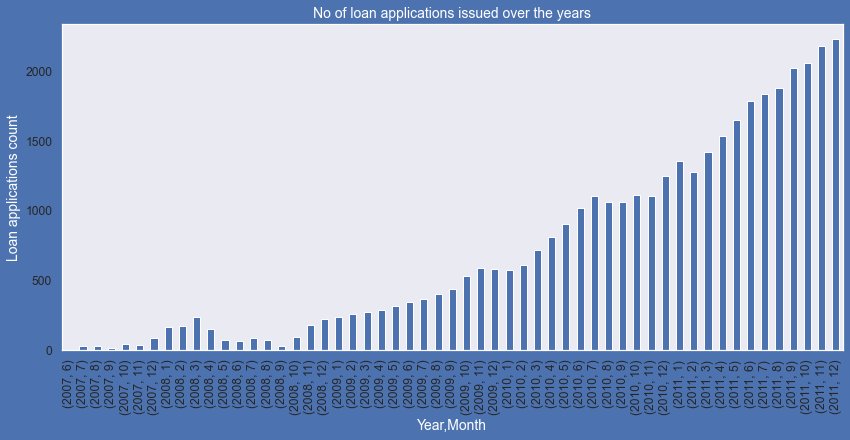

In [35]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='b')
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

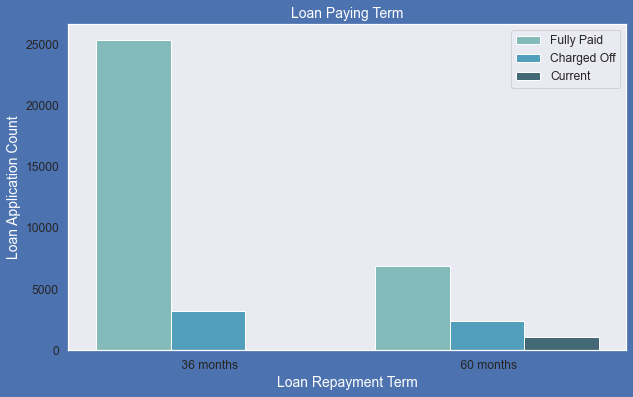

In [36]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

### Bivariate Analysis : Part 1

In [37]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,20000-40000,75,3,228,306,0.25
0,0-20000,4,0,13,17,0.24
3,60000-80000,383,34,1636,2053,0.19
2,40000-60000,186,8,841,1035,0.18
4,80000 +,538,70,2657,3265,0.16


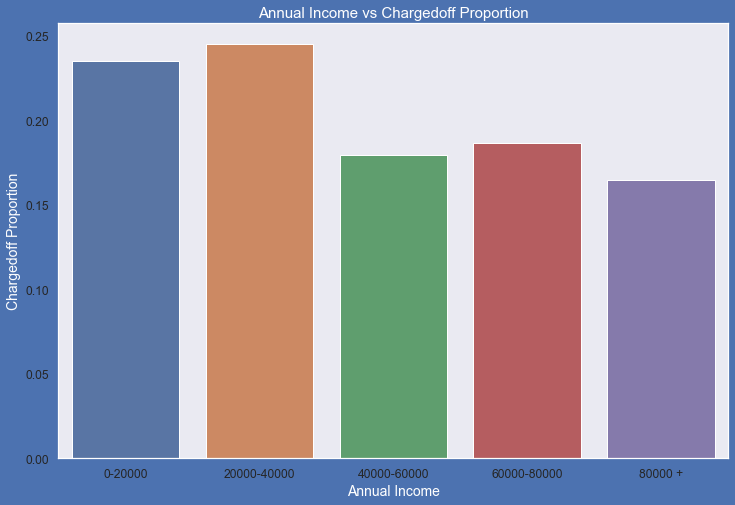

In [38]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [39]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,469.00,73.00,1227.00,1769.00,0.27
10,renewable_energy,18.00,1.00,79.00,98.00,0.18
3,educational,54.00,0.00,265.00,319.00,0.17
7,medical,106.00,10.00,555.00,671.00,0.16
9,other,617.00,124.00,3172.00,3913.00,0.16
8,moving,90.00,7.00,476.00,573.00,0.16
5,house,57.00,14.00,296.00,367.00,0.16
2,debt_consolidation,2742.00,577.00,15036.00,18355.00,0.15
12,vacation,53.00,6.00,319.00,378.00,0.14
4,home_improvement,335.00,95.00,2405.00,2835.00,0.12


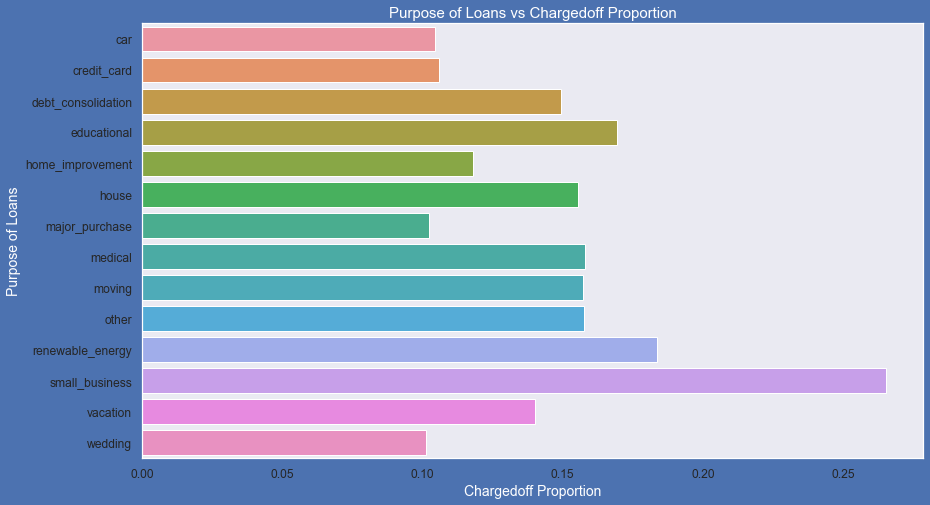

In [40]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [41]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,97,16,187,300,0.32
5,F,308,69,627,1004,0.31
4,E,697,173,1882,2752,0.25
3,D,1105,216,3871,5192,0.21
2,C,1338,261,6337,7936,0.17
1,B,1404,341,10048,11793,0.12
0,A,599,40,9303,9942,0.06


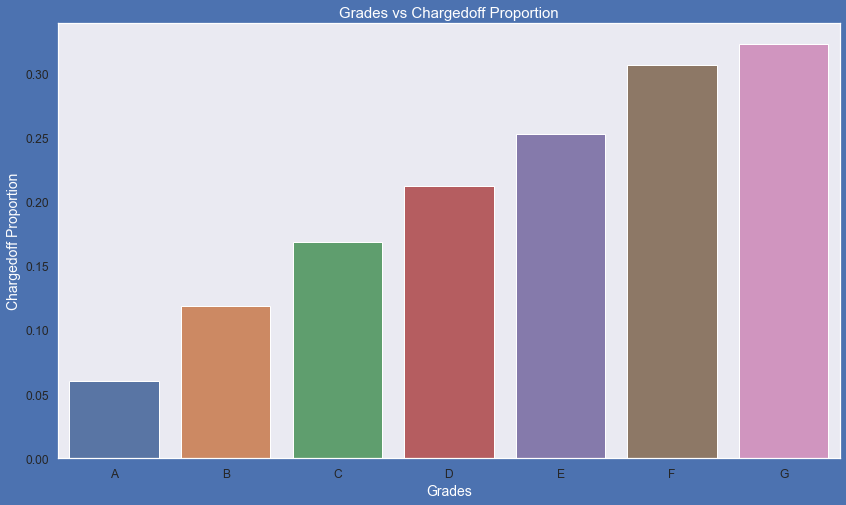

In [42]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [43]:
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,53.00,4.00,52.00,109.00,0.49
32,G3,19.00,3.00,24.00,46.00,0.41
31,G2,26.00,1.00,47.00,74.00,0.35
34,G5,9.00,0.00,18.00,27.00,0.33
28,F4,51.00,16.00,95.00,162.00,0.31
30,G1,31.00,10.00,61.00,102.00,0.30
23,E4,125.00,27.00,290.00,442.00,0.28
27,F3,50.00,11.00,117.00,178.00,0.28
26,F2,67.00,15.00,157.00,239.00,0.28
25,F1,87.00,23.00,206.00,316.00,0.28


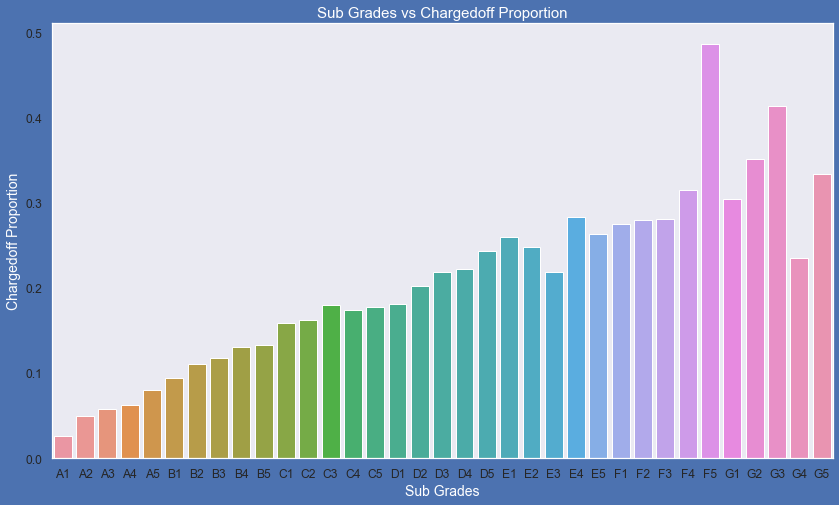

In [44]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [45]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1241,348,3267,4856,0.26
2,12.5-16,1985,328,9253,11566,0.17
1,10-13,1217,266,7984,9467,0.13
0,0-10,821,77,11311,12209,0.07


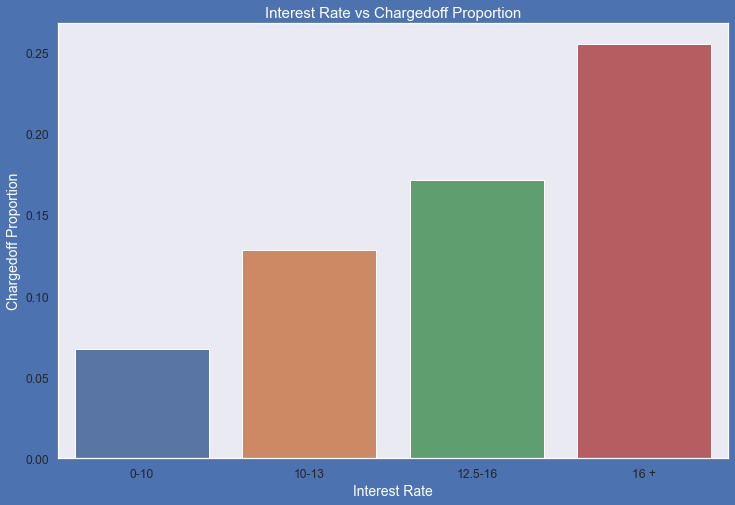

In [46]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [47]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,226,42,796,1064,0.21
10,10,1304,383,6934,8621,0.15
7,7,261,61,1424,1746,0.15
1,1,1085,143,6475,7703,0.14
5,5,451,87,2684,3222,0.14
8,8,200,42,1198,1440,0.14
6,6,303,57,1826,2186,0.14
3,3,548,79,3399,4026,0.14
4,4,454,93,2821,3368,0.13
2,2,560,97,3650,4307,0.13


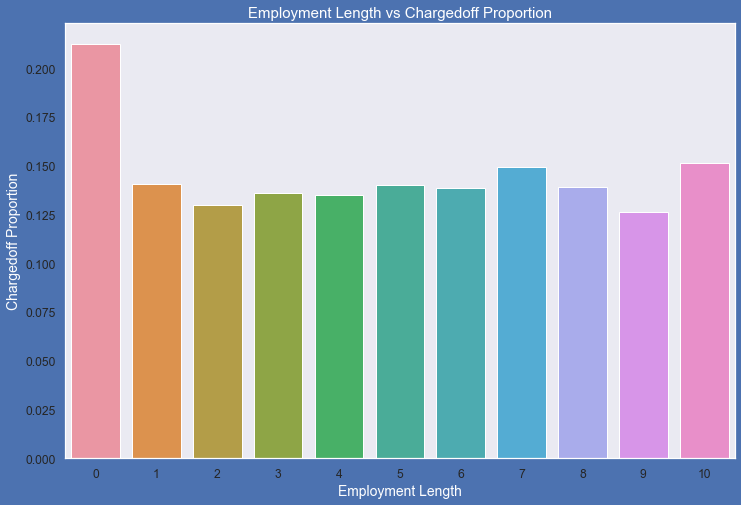

In [48]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

In [49]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.00,0.00,2.00,5.00,0.60
32,NV,106.00,17.00,367.00,490.00,0.22
40,SD,12.00,2.00,50.00,64.00,0.19
0,AK,14.00,2.00,62.00,78.00,0.18
9,FL,496.00,85.00,2234.00,2815.00,0.18
24,MO,114.00,16.00,549.00,679.00,0.17
13,ID,1.00,0.00,5.00,6.00,0.17
31,NM,30.00,5.00,149.00,184.00,0.16
11,HI,28.00,7.00,138.00,173.00,0.16
4,CA,1108.00,149.00,5700.00,6957.00,0.16


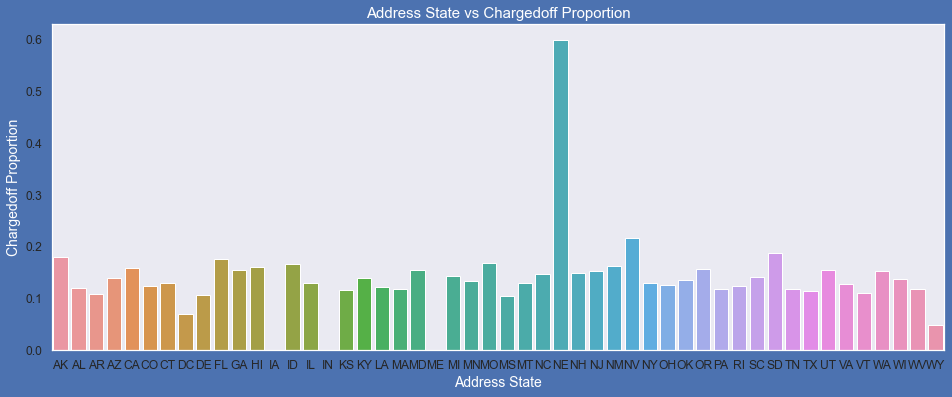

In [50]:
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

In [51]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2014,585,9818,12417,0.16
1,Source Verified,1413,304,8030,9747,0.14
0,Not Verified,2121,227,14407,16755,0.13


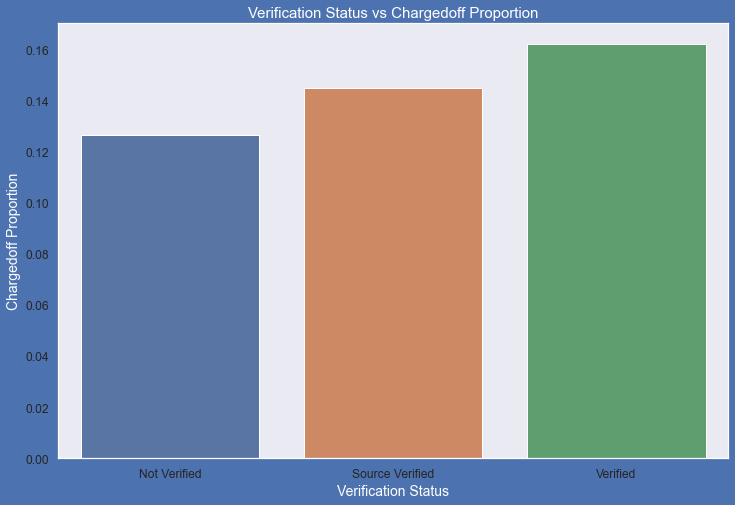

In [52]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [53]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,2,2.00,2.00,3.00,7.00,0.29
1,1,364.00,37.00,1260.00,1661.00,0.22
3,Not Known,115.00,0.00,561.00,676.00,0.17
0,0,5067.00,1077.00,30431.00,36575.00,0.14


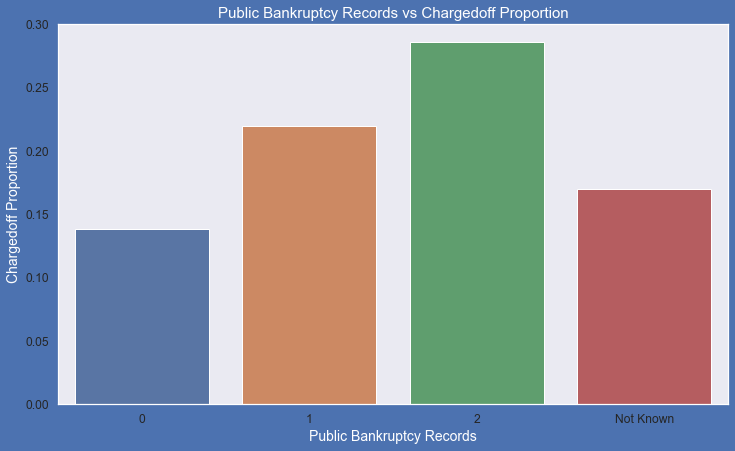

In [54]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [55]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,452.00,43.00,1542.00,2037.00,0.22
2,2,10.00,3.00,37.00,50.00,0.20
0,0,5086.00,1070.00,30667.00,36823.00,0.14
3,3,0.00,0.00,7.00,7.00,0.00
4,4,0.00,0.00,2.00,2.00,0.00


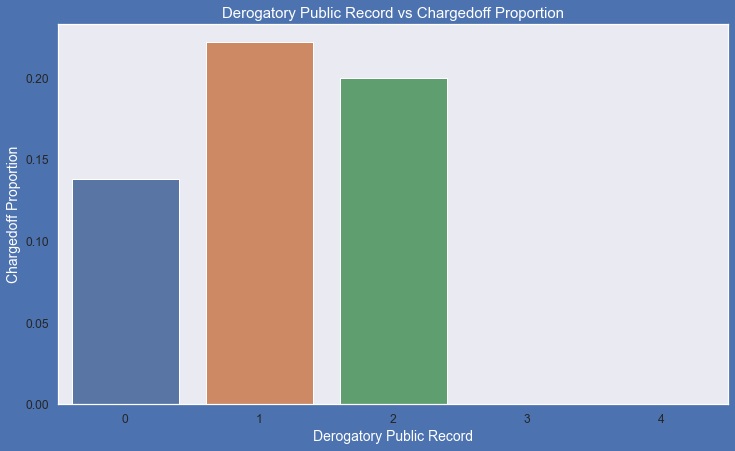

In [56]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

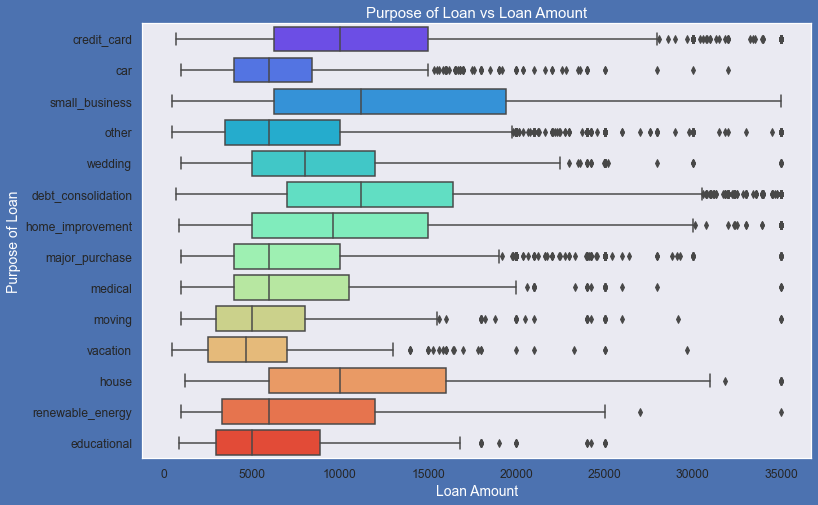

In [57]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

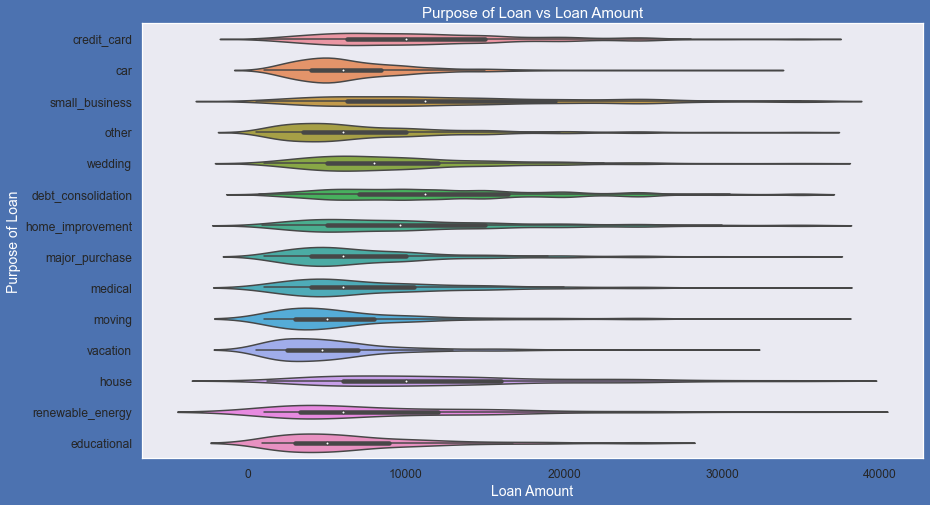

In [58]:
# Bivariate Analysis - Puprose of loan vs Loan amount
 
plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

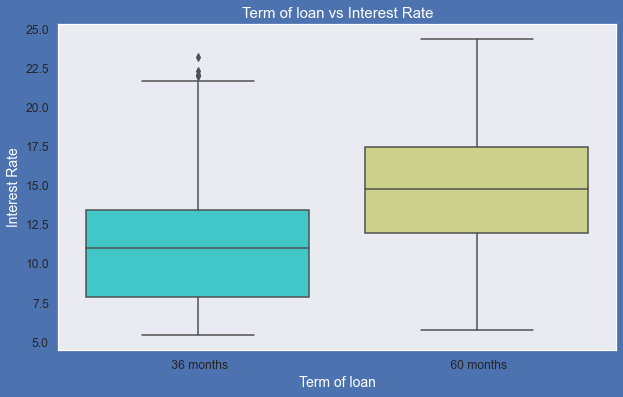

In [59]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

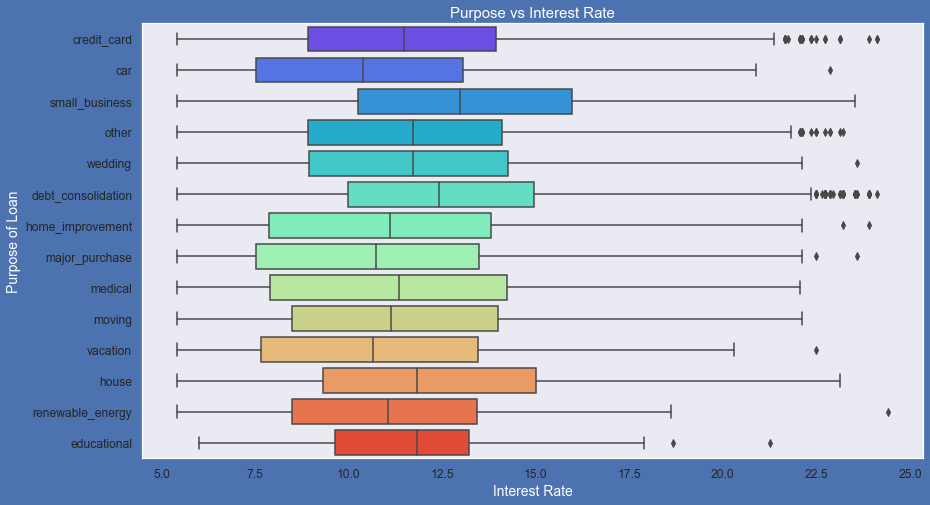

In [60]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

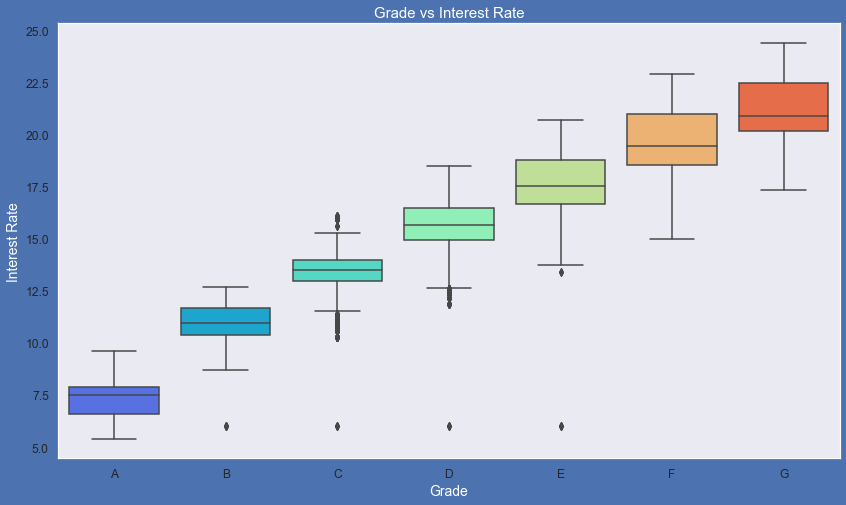

In [63]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

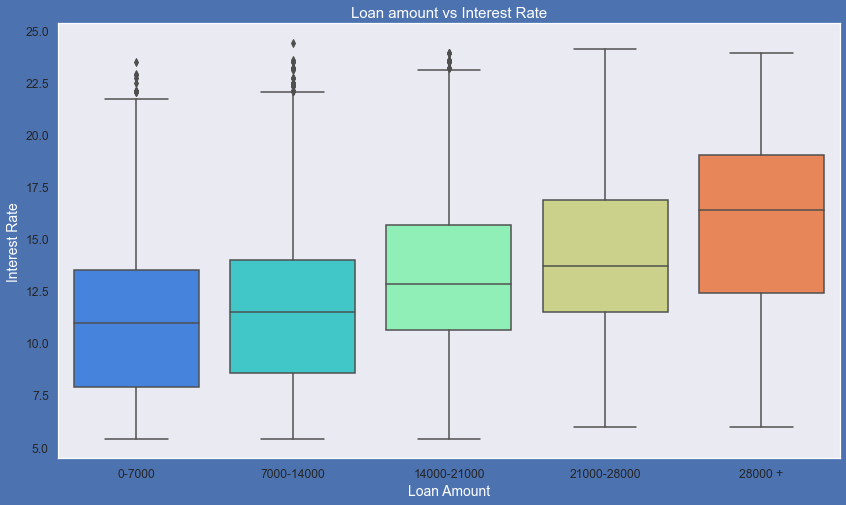

In [64]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

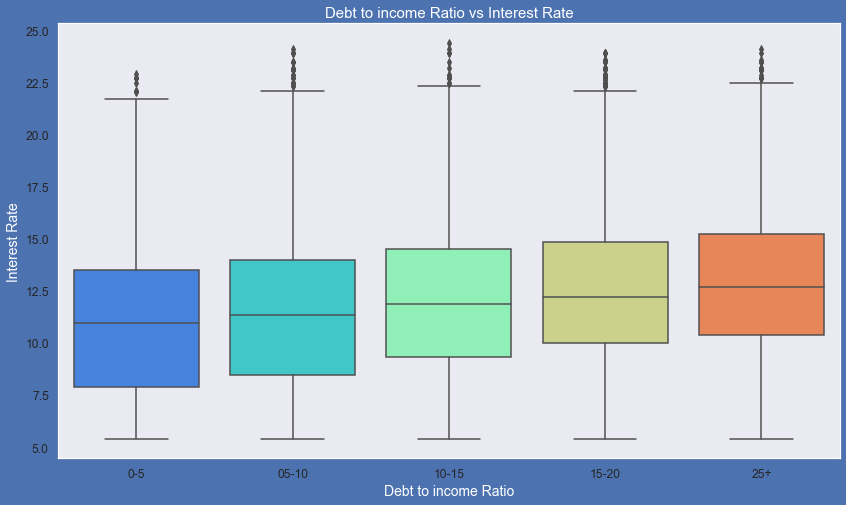

In [65]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

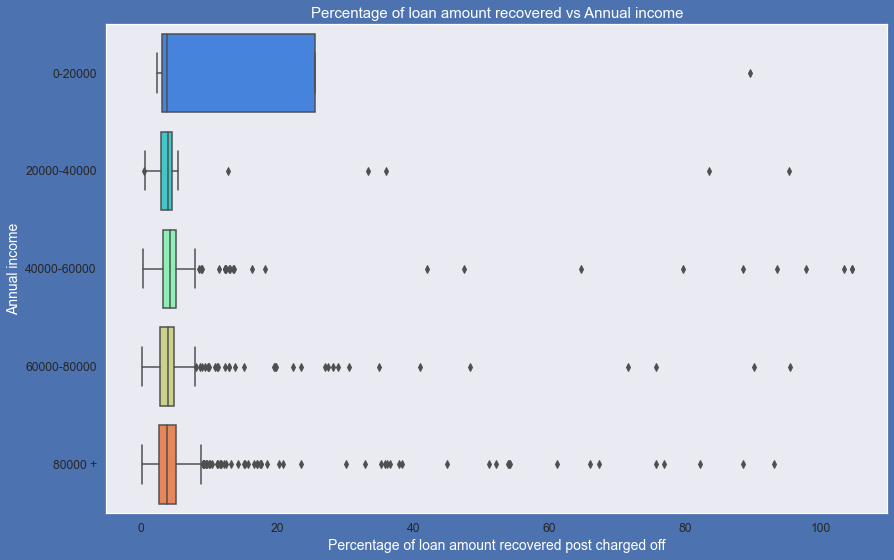

In [66]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

# Observations:
# Higher percentage of loan amount is recovered when annual income is high.
# Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

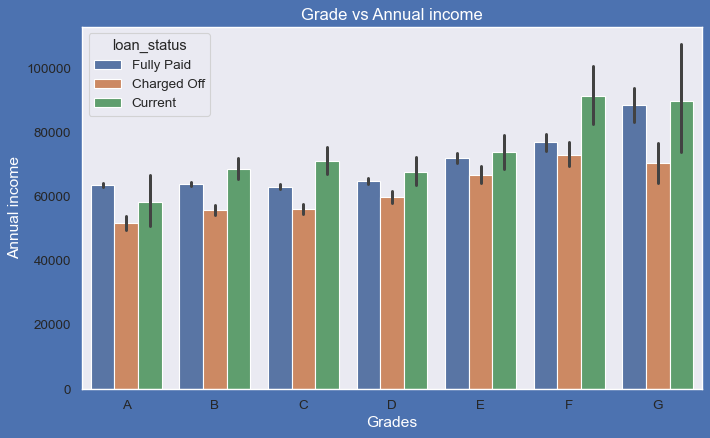

In [67]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

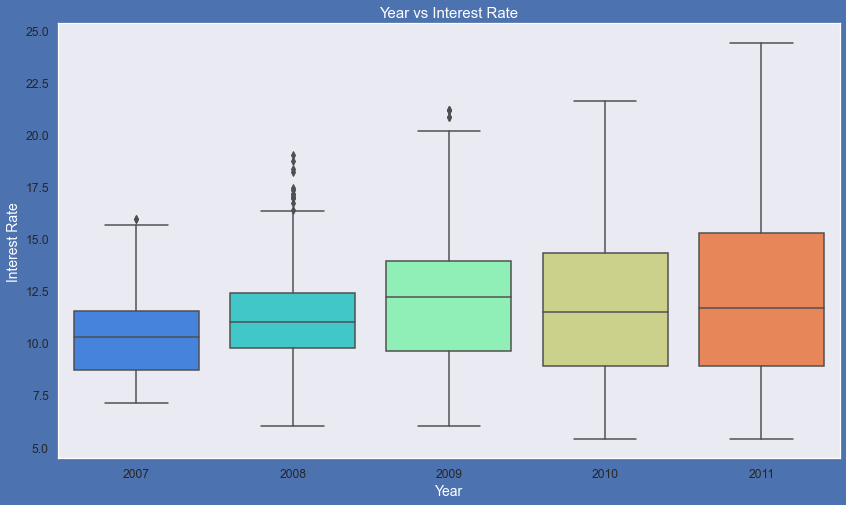

In [68]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loan,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

### Multivariate Analysis - Pair Plots

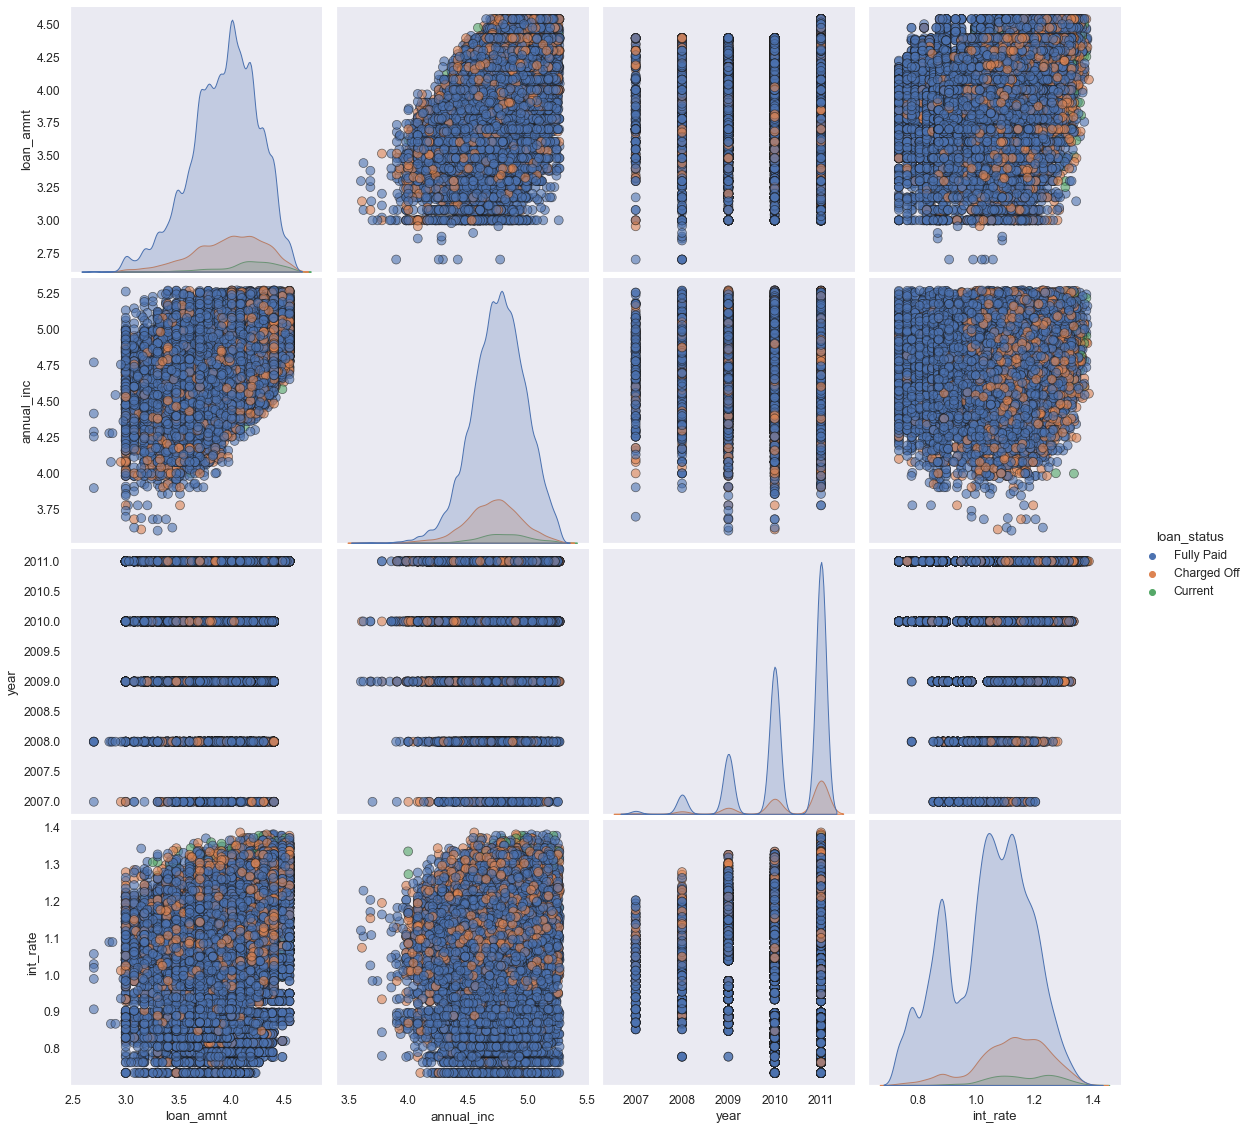

In [69]:

# Imp Coloumns

loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Loan status with Colour
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

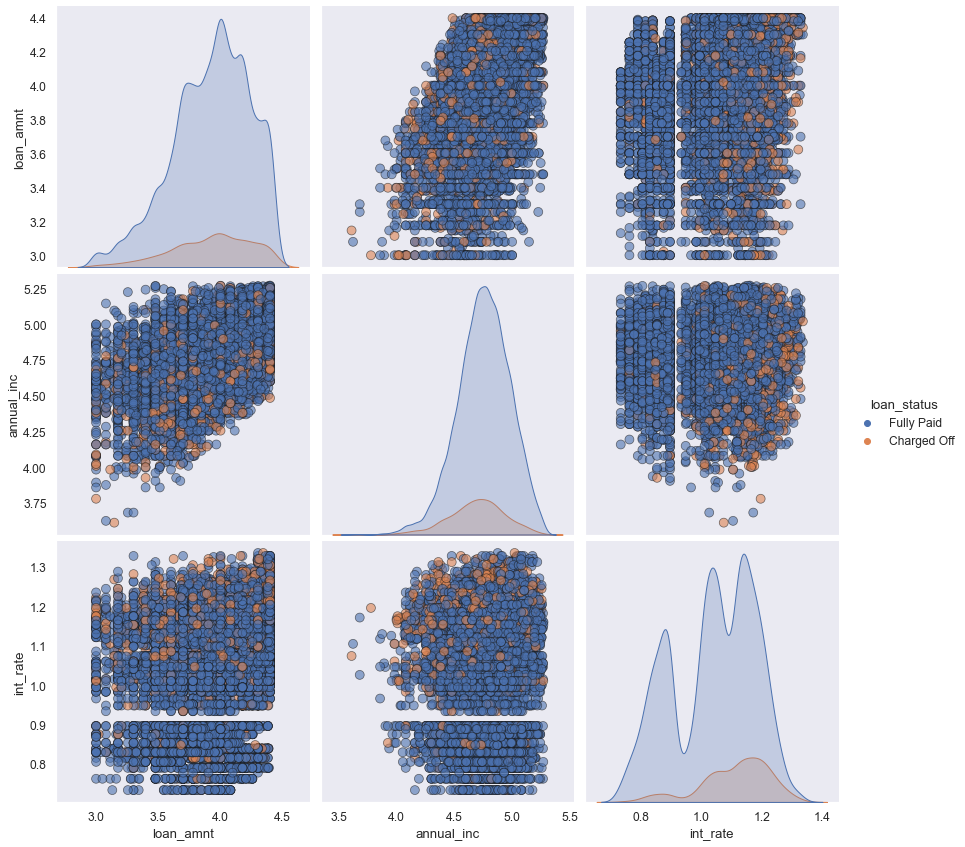

In [70]:
sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Intrest rate is increasing with loan amount increase this results in high charged off.